# Heart Attack Analysis & Prediction Dataset

dataset https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [200]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


age - age in years

sex - sex (1 = male; 0 = female)

cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

restecg - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)

ca - number of major vessels (0-3) colored by flourosopy

thal(thallium stress)- 0 to 3

output- 0(less chance of heart attack) and 1(more chance of heart attack)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trtbps      303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalachh    303 non-null int64
exng        303 non-null int64
oldpeak     303 non-null float64
slp         303 non-null int64
caa         303 non-null int64
thall       303 non-null int64
output      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [202]:
df.shape 

(303, 14)

In [203]:
print(df.groupby('output').size()) 

output
0    138
1    165
dtype: int64


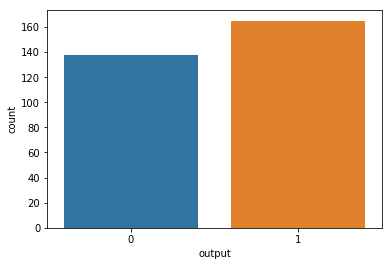

In [204]:
import seaborn as sns
sns.countplot(df['output'],label="Count")

## Data Preprocessing

In [205]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [206]:
df.eq(0).sum()

age           0
sex          96
cp          143
trtbps        0
chol          0
fbs         258
restecg     147
thalachh      0
exng        204
oldpeak      99
slp          21
caa         175
thall         2
output      138
dtype: int64

In [207]:
dups=df.duplicated()
print("Duplicated Lines:%d" % dups.sum())

Duplicated Lines:1


In [208]:
df.drop_duplicates(inplace=True)

In [209]:
df.shape 

(302, 14)

## Outliers

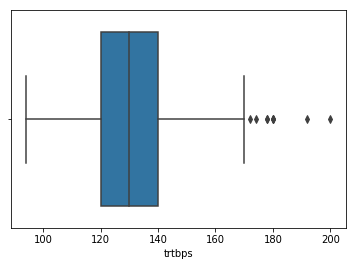

In [210]:
sns.boxplot(data=df,x=df['trtbps'])

In [211]:
Q1=df['trtbps'].quantile(0.25)
Q3=df['trtbps'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-(1.5)*IQR
Upper_Whisker = Q3+(1.5)*IQR
print(Lower_Whisker, Upper_Whisker)

120.0
140.0
20.0
90.0 170.0


In [212]:
df = df[df['trtbps']< Upper_Whisker]

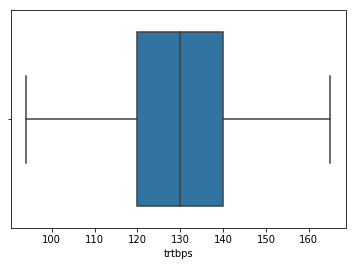

In [213]:
sns.boxplot(data=df,x=df['trtbps'])

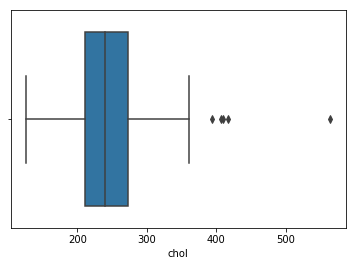

In [214]:
sns.boxplot(data=df,x=df['chol'])

In [215]:
Q1=df['chol'].quantile(0.25)
Q3=df['chol'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-(1.5)*IQR
Upper_Whisker = Q3+(1.5)*IQR
print(Lower_Whisker, Upper_Whisker)

211.0
273.0
62.0
118.0 366.0


In [216]:
df = df[df['chol']< Upper_Whisker]

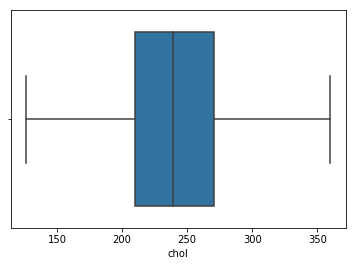

In [217]:
sns.boxplot(data=df,x=df['chol'])

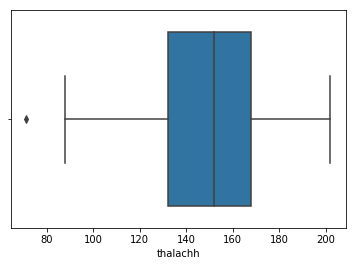

In [218]:
sns.boxplot(data=df,x=df['thalachh'])

In [219]:
Q1=df['thalachh'].quantile(0.25)
Q3=df['thalachh'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-(1.5)*IQR
Upper_Whisker = Q3+(1.5)*IQR
print(Lower_Whisker, Upper_Whisker)

132.0
168.0
36.0
78.0 222.0


In [220]:
df = df[df['thalachh'] > Lower_Whisker]

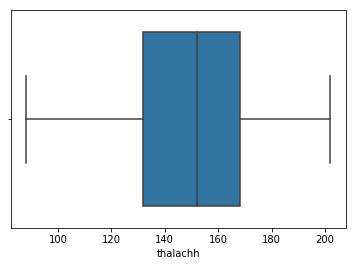

In [221]:
sns.boxplot(data=df,x=df['thalachh'])

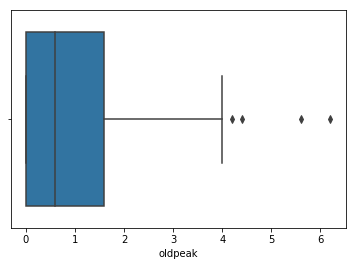

In [222]:
sns.boxplot(data=df,x=df['oldpeak'])

In [223]:
Q1=df['oldpeak'].quantile(0.25)
Q3=df['oldpeak'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-(1.5)*IQR
Upper_Whisker = Q3+(1.5)*IQR
print(Lower_Whisker, Upper_Whisker)

0.0
1.6
1.6
-2.4000000000000004 4.0


In [224]:
df = df[df['oldpeak']< Upper_Whisker]

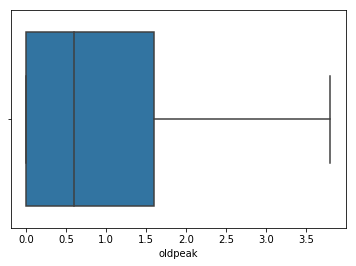

In [225]:
sns.boxplot(data=df,x=df['oldpeak'])

In [226]:
df.shape

(278, 14)

In [227]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.070019,-0.064953,0.270962,0.174521,0.109485,-0.098790,-0.413243,0.089023,0.201811,-0.145321,0.323962,0.047242,-0.219182
sex,-0.070019,1.000000,-0.103820,0.001950,-0.131447,0.085358,-0.080609,-0.044088,0.190694,0.163677,-0.058465,0.161788,0.226661,-0.324870
cp,-0.064953,-0.103820,1.000000,0.071822,-0.086831,0.098570,0.087063,0.283859,-0.376185,-0.095885,0.101905,-0.159726,-0.201820,0.418650
trtbps,0.270962,0.001950,0.071822,1.000000,0.104316,0.124292,-0.104823,-0.074902,-0.017655,0.117640,-0.045914,0.116596,-0.028289,-0.095389
chol,0.174521,-0.131447,-0.086831,0.104316,1.000000,0.018763,-0.141803,-0.020022,0.078791,-0.008052,0.061752,0.097049,0.085810,-0.101654
fbs,0.109485,0.085358,0.098570,0.124292,0.018763,1.000000,-0.075945,-0.022363,-0.004580,0.005698,-0.069224,0.146617,-0.040532,-0.021418
restecg,-0.098790,-0.080609,0.087063,-0.104823,-0.141803,-0.075945,1.000000,0.089535,-0.095487,-0.069910,0.101156,-0.090841,0.045007,0.161421
thalachh,-0.413243,-0.044088,0.283859,-0.074902,-0.020022,-0.022363,0.089535,1.000000,-0.387107,-0.344067,0.380673,-0.253913,-0.115956,0.424766
exng,0.089023,0.190694,-0.376185,-0.017655,0.078791,-0.004580,-0.095487,-0.387107,1.000000,0.292178,-0.259133,0.123029,0.213880,-0.424547
oldpeak,0.201811,0.163677,-0.095885,0.117640,-0.008052,0.005698,-0.069910,-0.344067,0.292178,1.000000,-0.538529,0.166906,0.195579,-0.425726


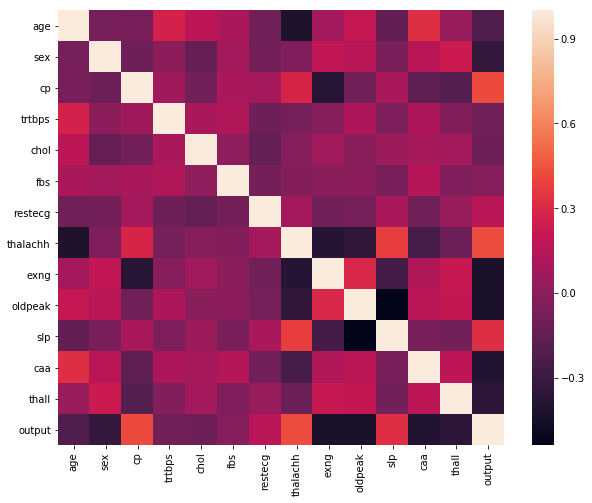

In [228]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
plt.show()

In [229]:
Output = pd.DataFrame(df.corr()['output'].sort_values(ascending=False))

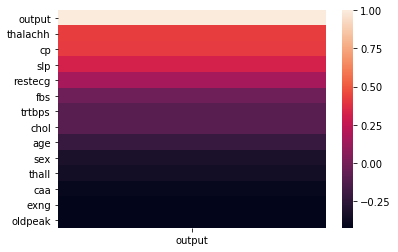

In [230]:
sns.heatmap(Output)

## Test Data Split and Standard Scaling

In [231]:
from sklearn.model_selection import train_test_split

In [232]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=66)

In [234]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_raw = scaler.fit_transform(X_train)
X_test_raw = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_raw, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_raw, columns=X_test.columns, index=X_test.index)

C:\Users\EGEMEN\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\EGEMEN\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\EGEMEN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


## Modeling and Prediction

In [235]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix ,classification_report,accuracy_score,recall_score,precision_score,f1_score

### Logistic Regression

In [236]:
lr = LogisticRegression()
#lr.fit(X_train, y_train.values.ravel()) # ravel() : 1d - array transform
lr = LogisticRegression(solver='lbfgs',random_state=66,C=1).fit(X_train, y_train.values.ravel())

In [237]:
print("Training set accuracy: {:.5f}".format(lr.score(X_train, y_train)))
print("Test set accuracy    : {:.5f}".format(lr.score(X_test, y_test)))

Training set accuracy: 0.85567
Test set accuracy    : 0.84524


In [238]:
y_pred_lr = lr.predict(X_test)
confusion_matrix(y_pred=y_pred_lr,y_true=y_test)

array([[28, 11],
       [ 2, 43]], dtype=int64)

In [239]:
print("Model Accuracy      : {:.5f}".format(accuracy_score(y_pred=y_pred_lr,y_true=y_test)))
print("Recall Score        : {:.5f}".format(recall_score(y_pred=y_pred_lr,y_true=y_test)))
print("Precision Score     : {:.5f}".format(precision_score(y_pred=y_pred_lr,y_true=y_test)))
print("F1 Score            : {:.5f}".format(f1_score(y_pred=y_pred_lr,y_true=y_test)))

Model Accuracy      : 0.84524
Recall Score        : 0.95556
Precision Score     : 0.79630
F1 Score            : 0.86869


### Support Vector Machine

In [240]:
svc = SVC(gamma='scale',random_state=66)
svc.fit(X_train, y_train.values.ravel())
print("Training set accuracy: {:.5f}".format(svc.score(X_train, y_train)))
print("Test set accuracy    : {:.5f}".format(svc.score(X_test, y_test)))

Training set accuracy: 0.93814
Test set accuracy    : 0.84524


In [241]:
y_pred_svm=svc.predict(X_test)
confusion_matrix(y_pred=y_pred_svm,y_true=y_test)

array([[28, 11],
       [ 2, 43]], dtype=int64)

In [242]:
print("Model Accuracy      : {:.5f}".format(accuracy_score(y_pred=y_pred_svm,y_true=y_test)))
print("Recall Score        : {:.5f}".format(recall_score(y_pred=y_pred_svm,y_true=y_test)))
print("Precision Score     : {:.5f}".format(precision_score(y_pred=y_pred_svm,y_true=y_test)))
print("F1 Score            : {:.5f}".format(f1_score(y_pred=y_pred_svm,y_true=y_test)))

Model Accuracy      : 0.84524
Recall Score        : 0.95556
Precision Score     : 0.79630
F1 Score            : 0.86869


## ROC Curve

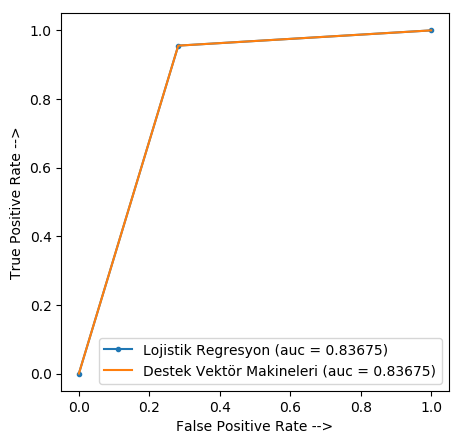

In [243]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_lr)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)

plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Lojistik Regresyon (auc = %0.5f)' % auc_logistic)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='Destek Vektör Makineleri (auc = %0.5f)' % auc_svm)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

#### Save Model and Testing

In [250]:
import pickle
lr.fit(X,y)
filename="lr_model"
pickle.dump(lr,open(filename,'wb'))

C:\Users\EGEMEN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EGEMEN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [251]:
lr_model=pickle.load(open(filename,'rb'))

In [252]:
prediction=lr_model.predict([[25,1,2,140,220,1,0,150,0,2.4,0,0,2]])

In [253]:
prediction

array([0], dtype=int64)